# Conversion of SOLEIL SWING *.h5 files to video plot with:
- Diffusion image
- Basler image with spot position
- Integrations (Horizontal, Vertical, Iso)
- 2D map (Azimuth, Radial)

In [1]:
import glob
import os
from IPython.display import clear_output
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as patches
from IPython.display import HTML
import h5_integrate as integ
from IPython.display import clear_output
from moviepy.editor import ImageSequenceClip
import fabio
%matplotlib widget

## Data extraction from h5 (images, positions and integrations) to numpy arrays

In [2]:
path = '/home-local/ratel-ra/Bureau/Lien_vers_NCO/Manips/DATA_SAXS/SWING_µSAXS/20231871/2024/Run3/assemblages/pmco_serie/pmco7_al3c_zoomb/'
data_dir= path
offset = 0
sector_angle = 45
save_data = True
save_positions = True 
save_basler_image = True
mask = '/home-local/ratel-ra/Documents/SAXS_data/SAXS_SWING/20231871/mask.edf'  

In [3]:
dir=integ.extract_h5_from_dir(data_dir,offset,sector_angle,mask,save_data=save_data,
                              save_positions = save_positions, save_basler_image = save_basler_image)
print('Extracted Numpy arrays are stored in ',dir)

Extracted Numpy arrays are stored in  /home-local/ratel-ra/Bureau/Lien_vers_NCO/Manips/DATA_SAXS/SWING_µSAXS/20231871/2024/Run3/assemblages/pmco_serie/pmco7_al3c_zoomb/PMCo7_Al3c


In [4]:
#dir='/home-local/ratel-ra/Bureau/Lien_vers_NCO/Manips/DATA_SAXS/SWING_µSAXS/20231871/2024/Run3/assemblages/144_d_serie/144d_hp_test_vide/144d_hp_test_vide/'

## Create Numpy files list of numpy in selected folder

In [5]:
#load and sort diffusion images of folder
image_file_list=glob.glob(dir+'/image/'+'*.npy')
image_file_list=sorted(image_file_list,key=integ.extract_number)

#load and sort positions images of folder
positions_file_list=glob.glob(dir+'/positions/'+'*.npy')
positions_file_list=sorted(positions_file_list,key=integ.extract_number)

#load and sort integration data of diffusion images
# intensities contains qh, qv and q_iso
intensities_file_list=glob.glob(dir+'/integration/'+'*_integrations.npy')
intensities_file_list=sorted(intensities_file_list,key=integ.extract_number)
q_file=glob.glob(dir+'/integration/'+'*_q.npy')[0]

#load and sort basler images of folder
basler_image_filelist=glob.glob(dir+'/basler_image/'+'*.npy')
basler_image_filelist=sorted(basler_image_filelist,key=integ.extract_number)
basler_image_file=basler_image_filelist[0]

#load and sort integration map images of folder
qmap_file=glob.glob(dir+'/integration/'+'*_qmap.npy')[0]
chimap_file = glob.glob(dir+'/integration/'+'*_chimap.npy')[0]
imap_file_list=glob.glob(dir+'/integration/'+'*_imap.npy')
imap_file_list=sorted(imap_file_list,key=integ.extract_number)

# # Load parameters dictionnary (edf header format)
# params=glob.glob(dir+'/params/'+'*_params.npy')[0]

# Load Cave image
cave_image_file_list=glob.glob(dir+'/cave_image/'+'*.npy')
cave_image_file_list=sorted(cave_image_file_list,key=integ.extract_number)


## Data visualization

Set Origin position on basler image

In [6]:
#expected values: X0=186, Z0=309
X0 = 186
Z0 = 309

crop = 1024

and check...

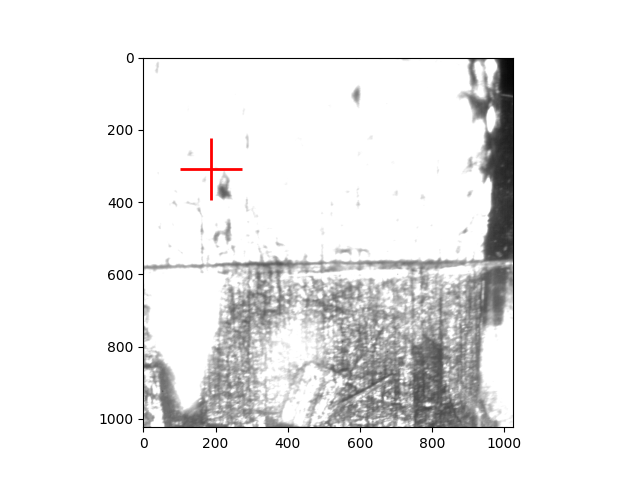

In [7]:
basler_image=np.load(basler_image_file)
fig,ax = plt.subplots()
ax.imshow(basler_image[0:crop,0:crop], cmap = 'gray')
ax.scatter(X0,Z0, s = 2000, marker = '+', color = 'r', linewidths=2)#, facecolor = None)

## Load numpy arrays from file list

In [8]:
# Load diffusion images
image = integ.read_numpy_from_list(image_file_list)

# load positions and determine position grid
positions=integ.read_numpy_from_list(positions_file_list)
x=positions[:,:,0]
z=positions[:,:,1]
nbre_lignes=positions.shape[0]
nbre_colonnes=positions.shape[1]
print('nbre of lines:',nbre_lignes,', nbre of columns:',nbre_colonnes)

#load integration data
integrations= integ.read_numpy_from_list(intensities_file_list)
q_array=np.load(q_file)
qh=q_array[0]
qv=q_array[1]
q_iso=q_array[2]

# load integration maps
qmap=np.load(qmap_file)
chimap=np.load(chimap_file)
imaps=integ.read_numpy_from_list(imap_file_list)

# Load cave image
cave_image = integ.read_numpy_from_list(cave_image_file_list)


the list contains 12 files
the list contains 12 files
nbre of lines: 12 , nbre of columns: 10
the list contains 12 files
the list contains 12 files
the list contains 12 files


## Create and check position grid

step x 24.977777777777987 step_z 25.099999999998346


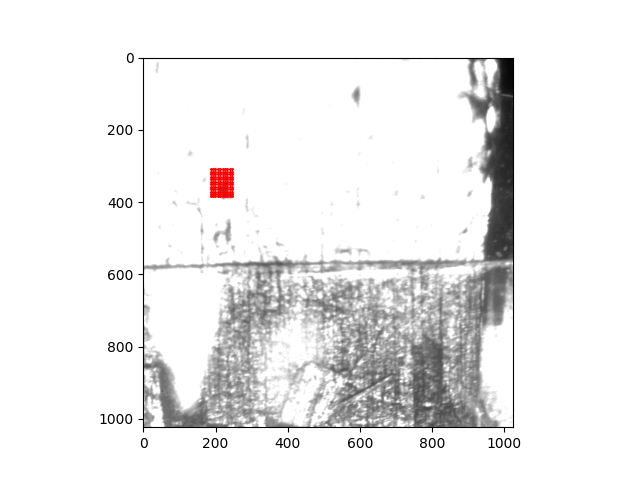

In [9]:
# basler_image=np.load(basler_image_file)
fig,ax=plt.subplots()
ax.imshow(basler_image[0:crop,0:crop],cmap='gray')


#calculate deta x and delta z and Convert in µm
try:
    step_x = 1000*(x[0,1]-x[0,0])
except:
    step_x = 0
try:
    step_z= 1000*(z[1,0]-z[0,0])
except:
    step_z=0
#step_x=50
rect_coordinates = np.array([X0,Z0])
print('step x',step_x, 'step_z',step_z)
positions_pixels = np.empty_like(positions)
for k in range (nbre_colonnes):
    for l in range (nbre_lignes):
        x_pix = rect_coordinates[0]+k*(step_x/3.73)
        z_pix = rect_coordinates[1]+l*(step_z/3.67)
        positions_pixels[l,k] = np.array([x_pix,z_pix])
x_pixels_ok=positions_pixels[:,:,0]
z_pixels_ok=positions_pixels[:,:,1] 

ax.scatter(positions_pixels[:,:,0],positions_pixels[:,:,1],marker='.',s=5,color = 'r')


## Plot all data in subplots and save plots

In [10]:
print(dir)

/home-local/ratel-ra/Bureau/Lien_vers_NCO/Manips/DATA_SAXS/SWING_µSAXS/20231871/2024/Run3/assemblages/pmco_serie/pmco7_al3c_zoomb/PMCo7_Al3c


In [11]:
samplename=data_dir.split('/')[-1]

plotdir=dir+'/plots'
os.makedirs(plotdir,exist_ok=True)
plt.ioff()
k=1
nbre_fichiers=nbre_colonnes*nbre_lignes
for i in range (nbre_lignes):
    for j in range(nbre_colonnes):
        fig,ax=plt.subplots(2,2,figsize=(10,10))
        
        ax[0,0].imshow(basler_image[0:crop,0:crop],cmap='gray')
        ax[0,0].scatter(x_pixels_ok,z_pixels_ok,s=2,marker='.',color='y')
        ax[0,0].scatter(x_pixels_ok[i][j],z_pixels_ok[i][j],s=15,marker='o',color='r')

        ax[0,1].imshow(np.log1p(cave_image[i][j]),cmap='jet')

        ax[1,0].loglog(qh,integrations[i,j,0,:],label='h')
        #ax.loglog(qh,integrations[0][0][0])
        ax[1,0].loglog(qv,integrations[i,j,1,:],label='v')
        ax[1,0].loglog(q_iso,integrations[i,j,2,:],label='iso')
        ax[1,0].legend()
        fig.suptitle(samplename+', x=%.2f'%x[i,j]+', z=%.2f'%z[i,j])
        figname=plotdir+'/plot_line%02d'%i+'_column%02d'%j+'.png'

        ax[1,1].set_xscale('log')
        ax[1,1].set_xlabel('q 1/A')
        ax[1,1].set_ylabel('Azimuhtal angle (°)')
        cax=ax[1,1].imshow(np.log1p(imaps[i][j]),origin="lower",extent=[qmap.min(),qmap.max(),chimap.min(),chimap.max()],aspect="auto",cmap='jet')
        
            
        plt.tight_layout()
        plt.savefig(figname)
        print('File %d'%k, ' out of %d '%nbre_fichiers)
        clear_output(wait=True)
        k+=1
      
        


File 120  out of 120 


## Convert to video

In [12]:
print(dir)
#Specify the path to your images
image_folder = plotdir
plotfile_list=[]
for i in range(nbre_lignes):
    for j in range (nbre_colonnes):
        plotfile_list.append('plot_line%02d'%i+'_column%02d'%j+'.png')

image_files = [f'{image_folder}/{file}' for file in plotfile_list] 

# Create a video clip from the images
clip = ImageSequenceClip(image_files, fps=2)  # Set the desired frames per second (fps)

# Write the video file
clip.write_videofile(dir+'/'+f'{samplename}_video.mp4', codec='libx264')  # Output video file

/home-local/ratel-ra/Bureau/Lien_vers_NCO/Manips/DATA_SAXS/SWING_µSAXS/20231871/2024/Run3/assemblages/pmco_serie/pmco7_al3c_zoomb/PMCo7_Al3c
Moviepy - Building video /home-local/ratel-ra/Bureau/Lien_vers_NCO/Manips/DATA_SAXS/SWING_µSAXS/20231871/2024/Run3/assemblages/pmco_serie/pmco7_al3c_zoomb/PMCo7_Al3c/_video.mp4.
Moviepy - Writing video /home-local/ratel-ra/Bureau/Lien_vers_NCO/Manips/DATA_SAXS/SWING_µSAXS/20231871/2024/Run3/assemblages/pmco_serie/pmco7_al3c_zoomb/PMCo7_Al3c/_video.mp4



Moviepy - Done !
Moviepy - video ready /home-local/ratel-ra/Bureau/Lien_vers_NCO/Manips/DATA_SAXS/SWING_µSAXS/20231871/2024/Run3/assemblages/pmco_serie/pmco7_al3c_zoomb/PMCo7_Al3c/_video.mp4
